# Home Price Prediction

**Amacımız :** Belirli özniteliklere bakarak bir evin ne kadar fiyata satılabileceğini tahmin etmek.

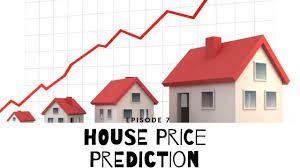

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
home_data_path = "/content/home_data.csv"
home_data = pd.read_csv(home_data_path)

In [ ]:
home_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
home_data.dropna(inplace=True)

<Figure size 1800x1800 with 0 Axes>

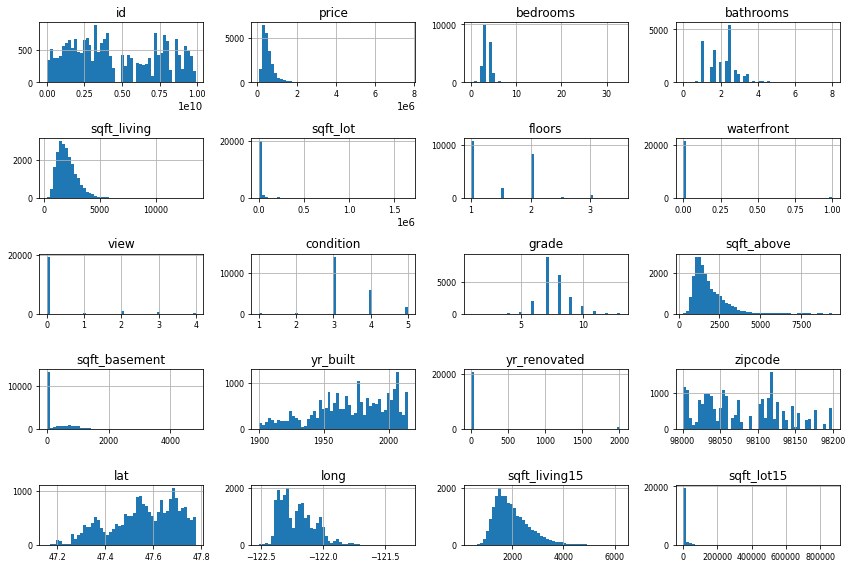

In [ ]:
plt.figure(figsize=(25,25))
home_data.hist(bins=50, xlabelsize = 8, ylabelsize = 8)
plt.tight_layout(rect=(0, 0, 2, 2))

Text(0.5, 1.0, 'Correlation Matrix')

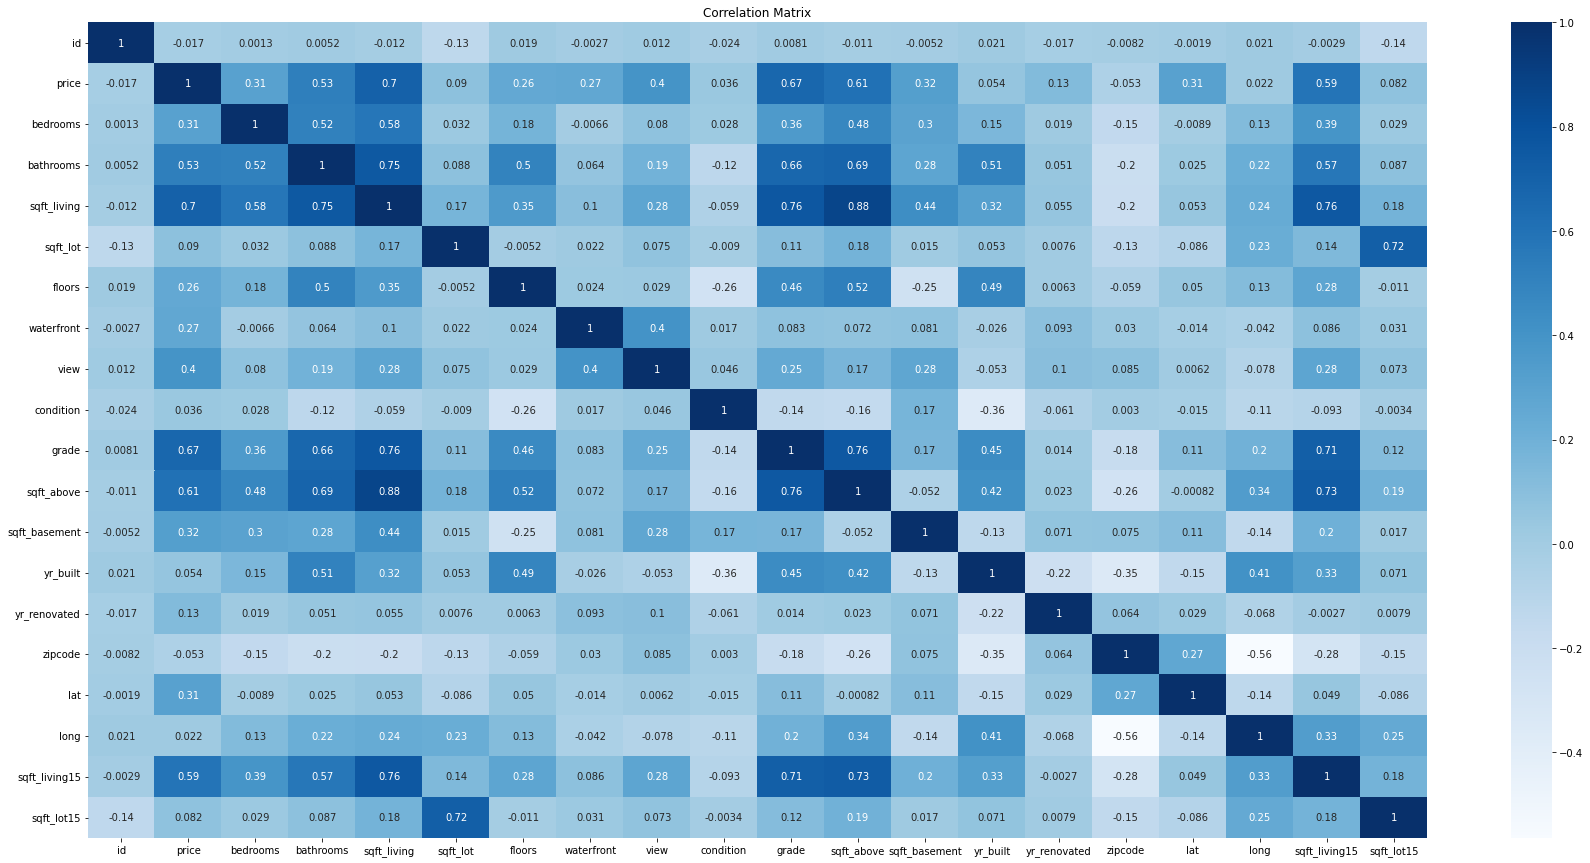

In [ ]:
plt.rcParams["figure.figsize"] = (30,15) # Custom figure size in inches
sns.heatmap(home_data.corr(), annot =True,cmap="Blues")
plt.title('Correlation Matrix')

En az fiyata sahip 5 evi bulalım.

In [ ]:
home_data.sort_values('price')[:5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000,1,0.00,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000,2,1.00,780,16344,1.0,0,0,1,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250


En fazla fiyata sahip 5 evi bulalım.

In [ ]:
home_data.sort_values('price',ascending=[False])[:5]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


Ortalama ev fiyatına bakalım.

In [ ]:
print("Ortalama ev fiyatı : ",home_data["price"].mean(),"$")

Ortalama ev fiyatı :  540088.1419053348 $


In [ ]:
home_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


2000 sqft ve 4000 sqft arasında büyüklüğe sahip olan evleri alalım.

In [ ]:
home_data_2_4 = home_data[home_data['sqft_living'].between(2000, 4000)].sort_values('sqft_living')
home_data_2_4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9904,2215900800,20140731T000000,290000,3,2.50,2000,7414,2.0,0,0,4,7,2000,0,1993,0,98038,47.3508,-122.057,2000,7414
3247,9818700215,20150330T000000,464000,5,2.00,2000,3000,1.5,0,0,3,6,1200,800,1931,0,98122,47.6028,-122.298,1330,4000
9443,136000220,20150325T000000,593000,2,2.50,2000,2500,3.0,0,1,3,8,1810,190,1994,0,98116,47.5788,-122.396,1970,5650
14861,3524049042,20140527T000000,375000,3,1.50,2000,7294,1.0,0,0,3,7,1520,480,1965,0,98118,47.5297,-122.267,2000,6000
17670,2141320230,20150410T000000,710000,4,2.25,2000,8068,2.0,0,0,5,8,2000,0,1976,0,98006,47.5584,-122.137,2080,7837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11978,7228501805,20140924T000000,739000,6,4.50,4000,7500,2.0,0,0,3,7,4000,0,1978,0,98122,47.6146,-122.306,1380,6298
3725,9558040820,20140709T000000,570000,6,3.75,4000,6015,2.0,0,2,3,10,3080,920,2004,0,98058,47.4530,-122.118,3180,5700
19907,7853440140,20150409T000000,802945,5,3.50,4000,9234,2.0,0,0,3,9,4000,0,2015,0,98024,47.5265,-121.887,3690,6600
847,3395050060,20140722T000000,628000,3,1.75,4000,11894,1.0,0,0,3,9,2190,1810,1987,0,98011,47.7738,-122.203,2530,8650


Tüm evlerin yüzde kaçı 2000 sqft - 4000 sqft arasında olduğunu belirliyelim.

In [ ]:
print("Bütün evler arasından 2000 sqft ve 4000 sqft arasında büyüklüğe sahip olan evler arasındaki oran : %",100 * float(len(home_data_2_4))/float(len(home_data)))

Bütün evler arasından 2000 sqft ve 4000 sqft arasında büyüklüğe sahip olan evler arasındaki oran : % 42.66413732475825


## Lineer regresyon modelleri

**"sqft_living"** özniteliği ile **"price"** yani evin fiyatını tahmin etmeye çalışacağız.Verimi %80 train %20 test olarak ayıracağız. 

In [ ]:
from sklearn.linear_model import LinearRegression#kütüphaneyi yükleme
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

lr_basic = LinearRegression()
x = home_data['sqft_living']
y = home_data[['price']]
X_train,X_test,y_train,y_test = train_test_split(x , y , test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
model1_basic_lin = lr_basic.fit(X_train,y_train)
print("Model 1 score : ",model1_basic_lin.score(X_train, y_train))

In [ ]:
y_kestirilen = model1_basic_lin.predict(X_test)#modelle mözellikten kestirim yapılması

In [ ]:
y_kestirilen[:10]

array([1652.49798531, 3887.83262287, 2115.09534083, 2236.19777943,
       2495.32907816, 1980.55646451, 1727.53263747, 1719.86514301,
       1875.85694987, 1989.28142407])

In [ ]:
y_test[:10]

17384    1430
722      4670
2680     1440
18754    1130
14554    3180
16227    1650
6631     1720
19813    2538
3367     2460
21372    4460
Name: sqft_living, dtype: int64

RMSLE (root mean square error) hatasına bakalım.

In [ ]:
rmse_basic_model1 = np.sqrt(metrics.mean_squared_error(y_test, y_kestirilen))
print('RMSE:', rmse_basic_model1)

RMSE: 647.3715598616461


Modelimizin katsayılarına bakalım.

In [ ]:
print("Kurulan model:")
print(' y = ',lr_basic.intercept_, ' + ',lr_basic.coef_[0], 'x')  
print(' fiyat = ',lr_basic.intercept_, ' + ',lr_basic.coef_[0], ' * sqft_living')  

Kurulan model:
 y =  2081.416714864083  +  649.8842947153299 x
 fiyat =  2081.416714864083  +  649.8842947153299  * sqft_living


Gerçek ve kestirilen değerlerin dağılımlarının çizdirelim.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


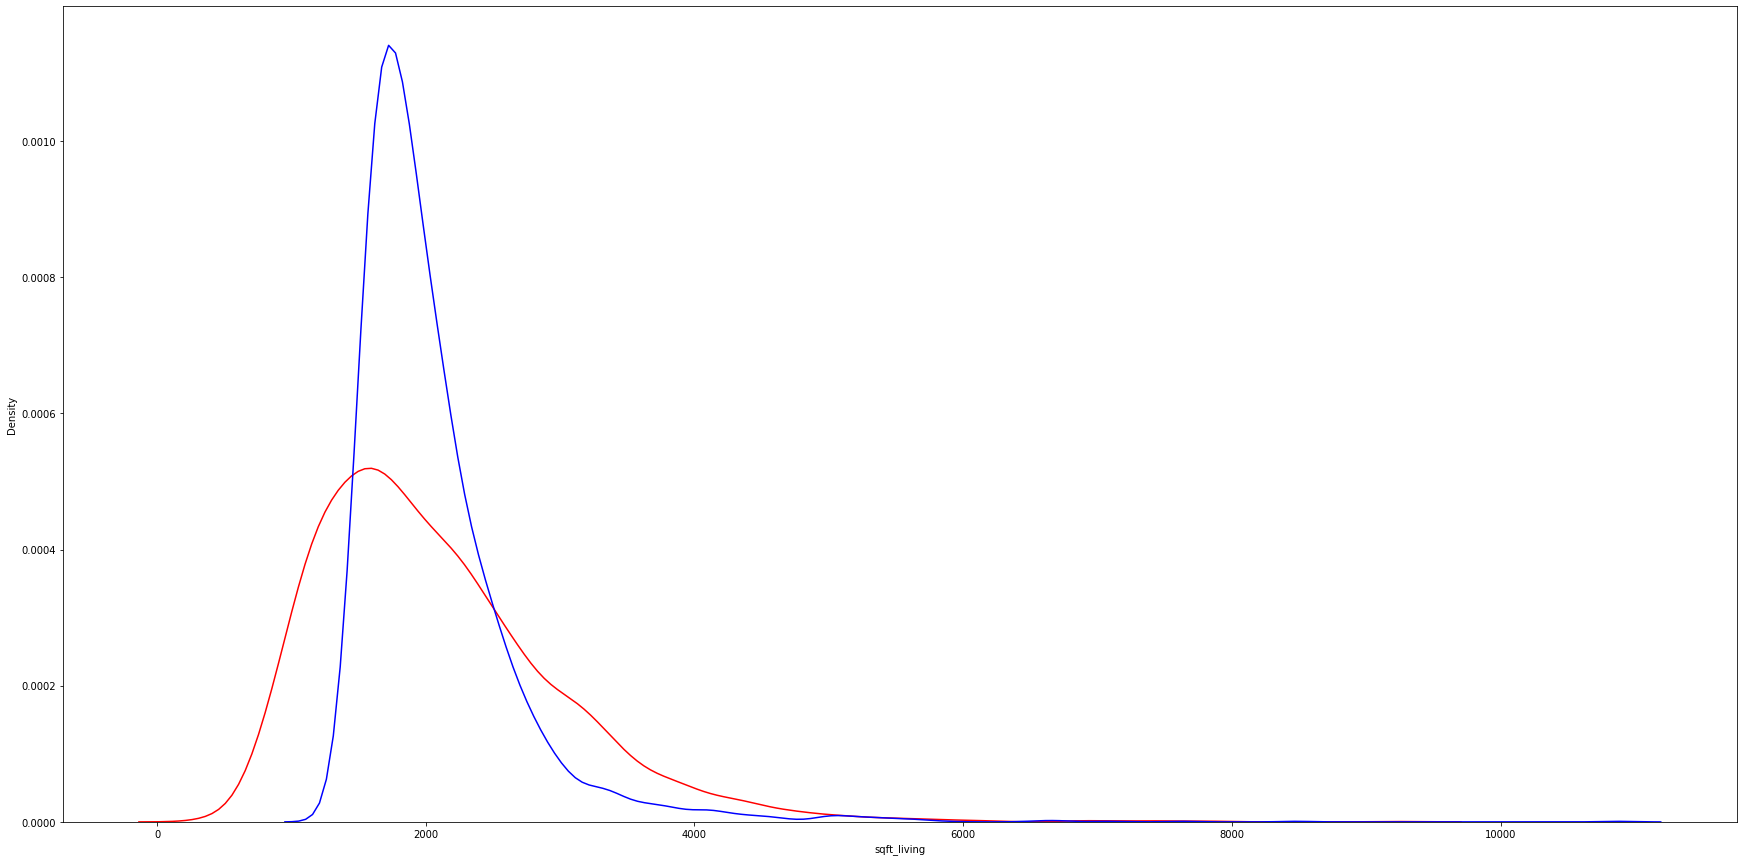

In [ ]:
#Gerçek ve kestirilen değerlerin dağılımlarının çizimi
ax1 = sns.distplot(y_test,hist=False,color='r',label='Gerçek değer')
sns.distplot(y_kestirilen,hist=False,color='b',label='Kestirilen değer',ax=ax1)

Test kümesi ve eğitilmiş modelimize ait regresyon eğrisini çizdirelim.

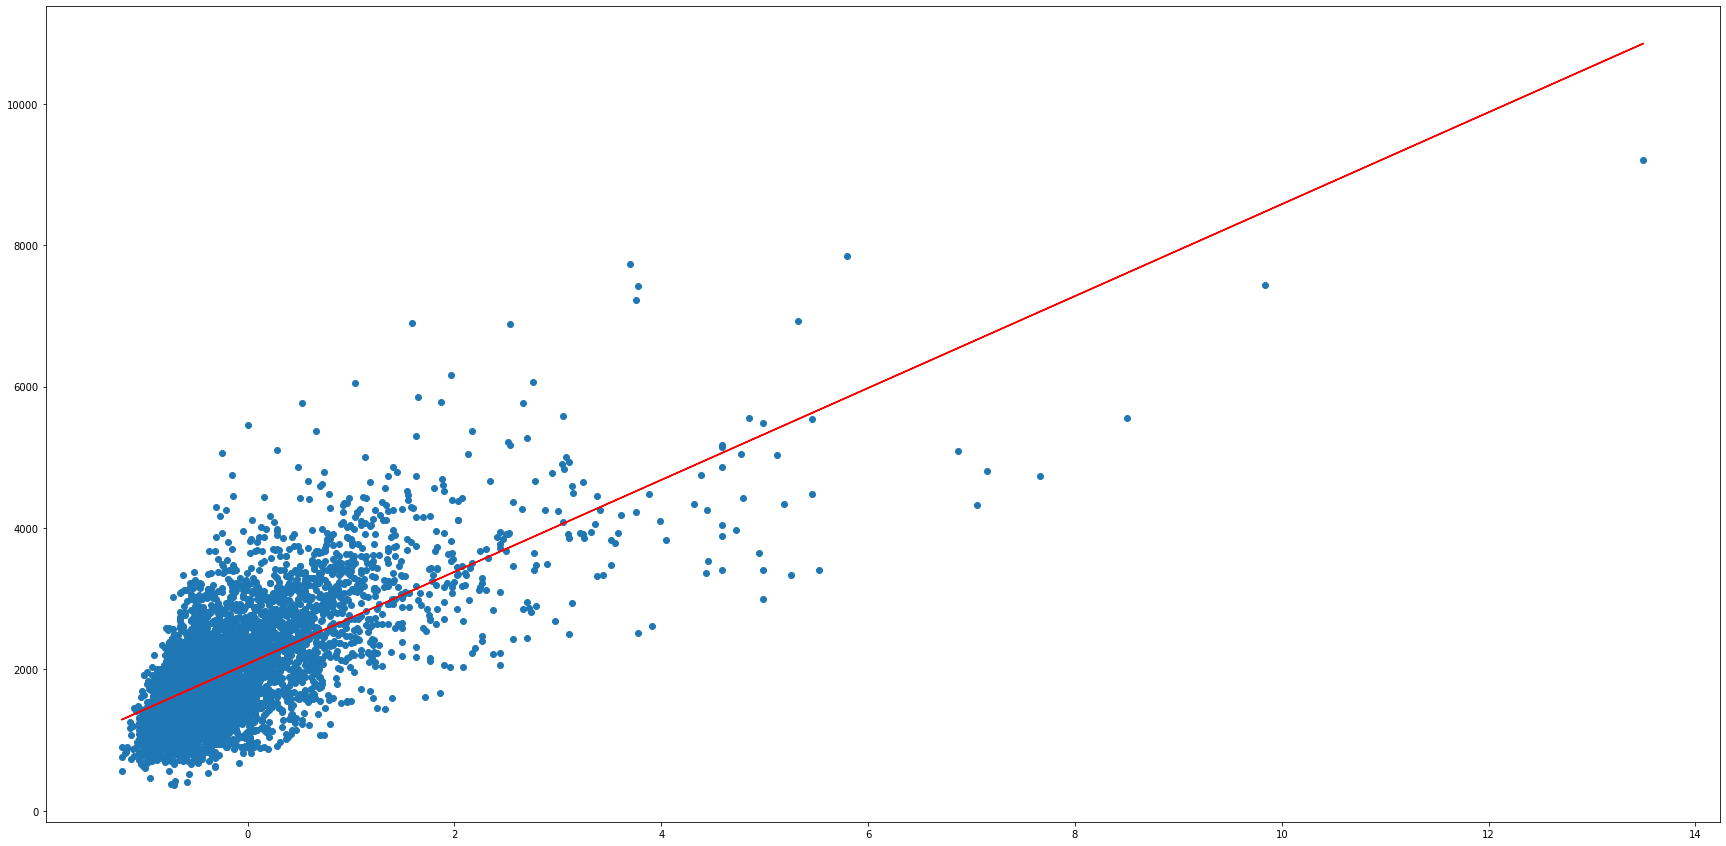

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_kestirilen, color='red')
plt.show()

Şimdi daha fazla öznitelik ile **"price"** yani ev fiyatlarını tahmin edelim.

In [ ]:
advanced_features=[
'bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode',
'condition', # condition of house
'grade', # measure of quality of construction
'waterfront', # waterfront property
'view', # type of view
'sqft_above', # square feet above ground
'sqft_basement', # square feet in basement
'yr_built', # the year built
'yr_renovated', # the year renovated
'lat', 'long', # the lat-long of the parcel
'sqft_living15', # average sq.ft. of 15 nearest neighbors
'sqft_lot15', # average lot size of 15 nearest neighbors
]

In [ ]:
lr_advenced = LinearRegression()
x = home_data[advanced_features]#hedef, series
y = home_data[['price']]#kullanılacak özellik, dataFrame 
X_train,X_test,y_train,y_test = train_test_split(x , y , test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

model2_advance_lin = lr_advenced.fit(X_train,y_train)
print("Model 1 score : ",model2_advance_lin.score(X_train, y_train))

Model 1 score :  0.7005349313350031


In [ ]:
y_kestirilen = model2_advance_lin.predict(X_test)

RMSE (root mean square error) hatasına bakalım.

In [ ]:
rmse_advance_model2 = np.sqrt(metrics.mean_squared_error(y_test, y_kestirilen))
print('RMSE:', rmse_advance_model2)

RMSE: 192355.44075378097


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


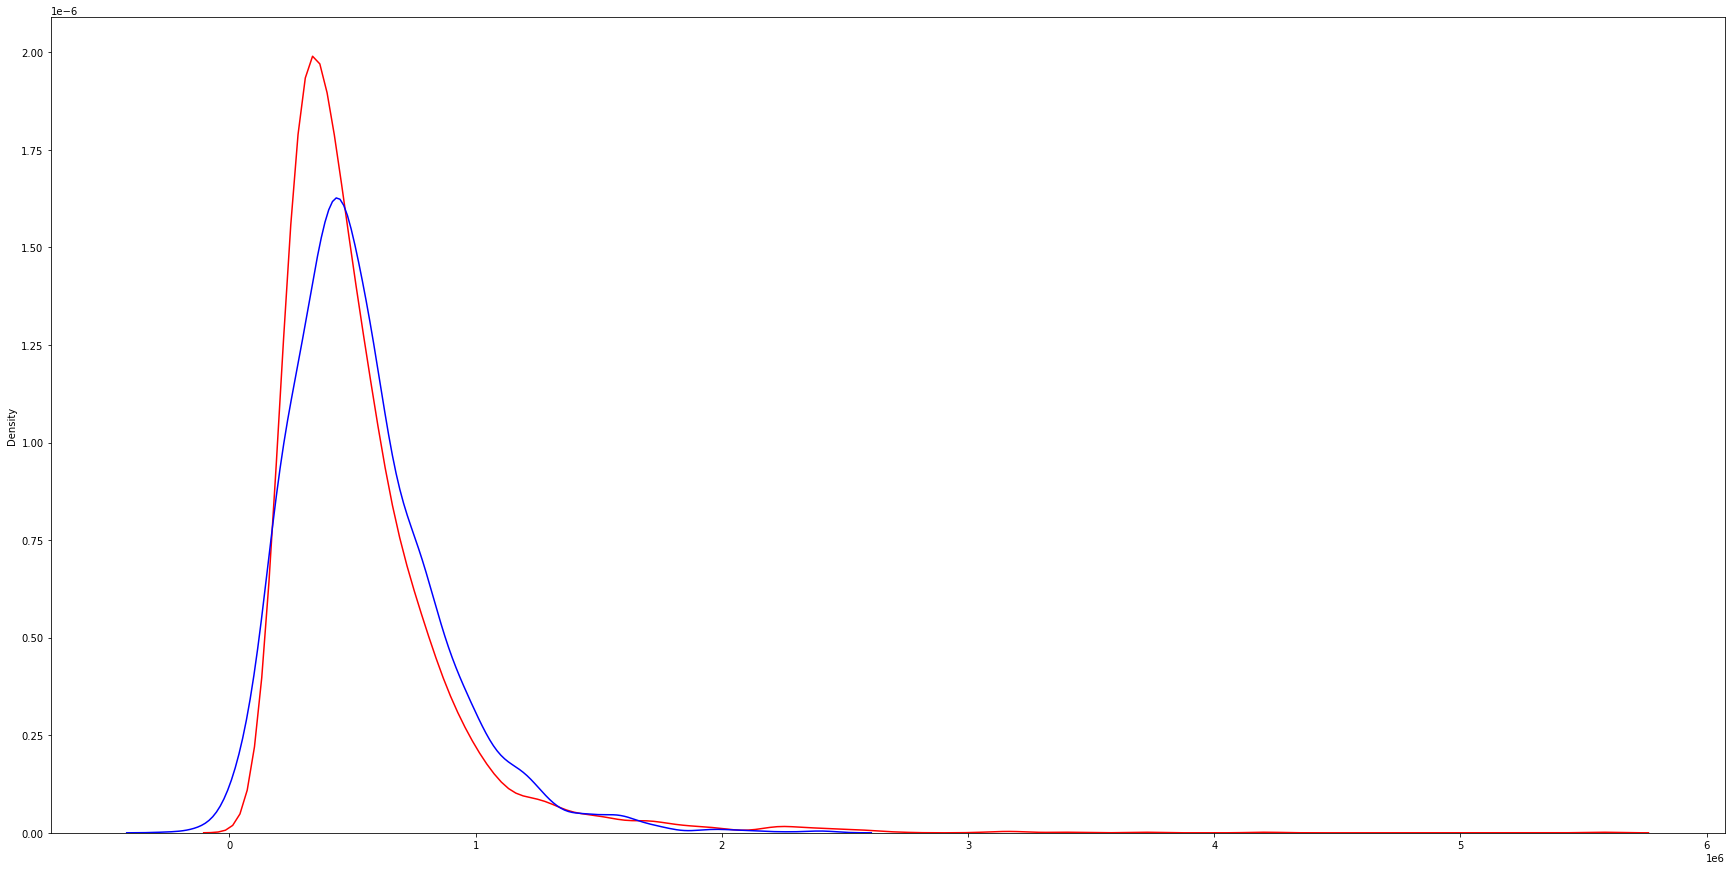

In [ ]:
ax1 = sns.distplot(y_test,hist=False,color='r',label='Gerçek değer')
sns.distplot(y_kestirilen,hist=False,color='b',label='Kestirilen değer',ax=ax1)

Test kümesi ve eğitilmiş modelimize ait regresyon eğrisini çizdirelim.

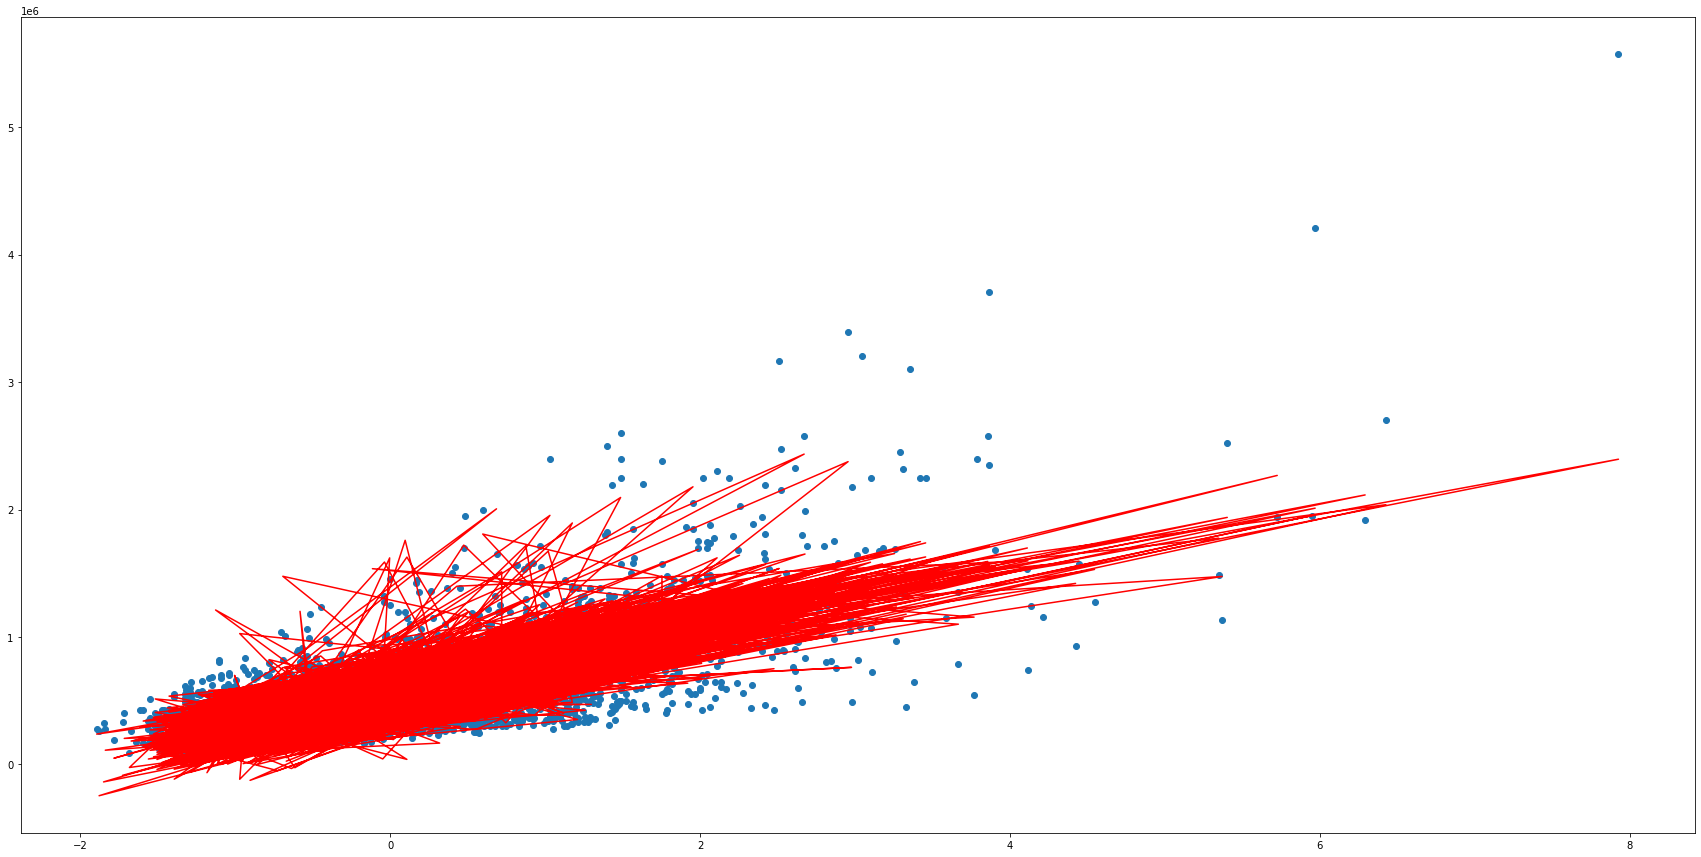

In [ ]:
plt.scatter(X_test[:,2:3], y_test)
plt.plot(X_test[:,2:3], y_kestirilen, color='red')
plt.show()

## Polinom regresyon modelleri

### 2.derece polinom modelleri
**"sqft_living"** özniteliğini kullanarak **"price"** özniteliğini tahmin etmek için 2.derece polinom regresyon modelini kullanacağız.

In [ ]:
from sklearn import preprocessing
X = home_data.iloc[:, 5:6].values#hedef, series
Y = home_data['price'].values#kullanılacak özellik, dataFrame 
X_train,X_test,y_train,y_test = train_test_split(X , Y , test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
model3_basic_poly2 = lin_reg.fit(X_poly, y_train)
print("Model 3 score : ",model3_basic_poly2.score(X_poly, y_train))

Model 3 score :  0.536447164585469


In [ ]:
X_poly_test = poly_reg.fit_transform(X_test)

In [ ]:
y_kestirilen = lin_reg.predict(X_poly_test)

In [ ]:
rmse_basic_model3 = np.sqrt(metrics.mean_squared_error(y_test, y_kestirilen))
print('RMSE:', rmse_basic_model3)

RMSE: 240272.02091172073


In [ ]:
y_pred = lin_reg.predict(X_poly)

In [ ]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_kestirilen})
df

,Real Values,Predicted Values
0,297000,3.759359e+05
1,1578000,1.364503e+06
2,562100,3.777518e+05
3,631500,3.250167e+05
4,780000,8.101638e+05
...,...,...
4318,844000,7.821185e+05
4319,335500,3.462365e+05
4320,369950,3.634390e+05
4321,300000,2.977693e+05


Test kümesi ve eğitilmiş modelimize ait regresyon eğrisini çizdirelim.

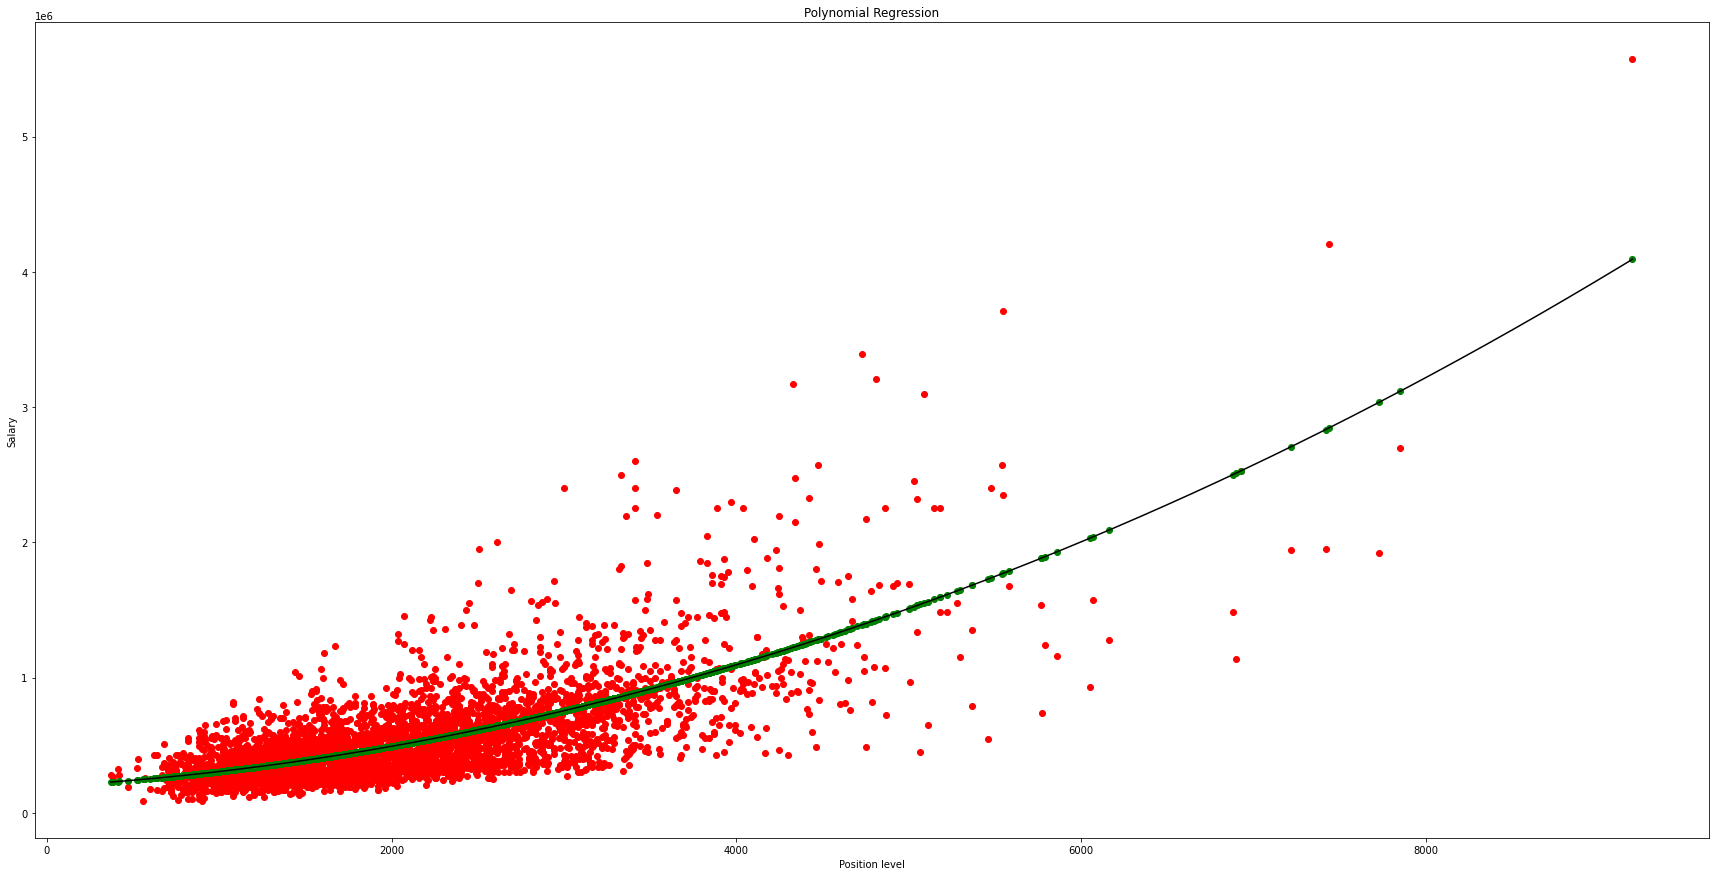

In [ ]:
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_kestirilen, color = 'green')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
from sklearn import preprocessing
X = home_data[advanced_features]#hedef, series
Y = home_data['price']#kullanılacak özellik, dataFrame 
X_train,X_test,y_train,y_test = train_test_split(X , Y , test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
model4_advance_poly2 = lin_reg.fit(X_poly, y_train)
print("Model 4 score : ",model4_advance_poly2.score(X_poly, y_train))

Model 4 score :  0.833165089314153


In [ ]:
X_poly_test = poly_reg.fit_transform(X_test)

In [ ]:
y_kestirilen = model4_advance_poly2.predict(X_poly_test)

In [ ]:
y_pred = model4_advance_poly2.predict(X_poly)

In [ ]:
rmse_advance_model4 = np.sqrt(metrics.mean_squared_error(y_test, y_kestirilen))
print('RMSE:', rmse_advance_model4)

RMSE: 152394.889361217


In [ ]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_kestirilen})
df

,Real Values,Predicted Values
17384,297000,3.756105e+05
722,1578000,1.968563e+06
2680,562100,5.515976e+05
18754,631500,5.770306e+05
14554,780000,8.155292e+05
...,...,...
5427,844000,8.535957e+05
16547,335500,4.048122e+05
4585,369950,3.292984e+05
17762,300000,2.907923e+05


Test kümesi ve eğitilmiş modelimize ait regresyon eğrisini çizdirelim.

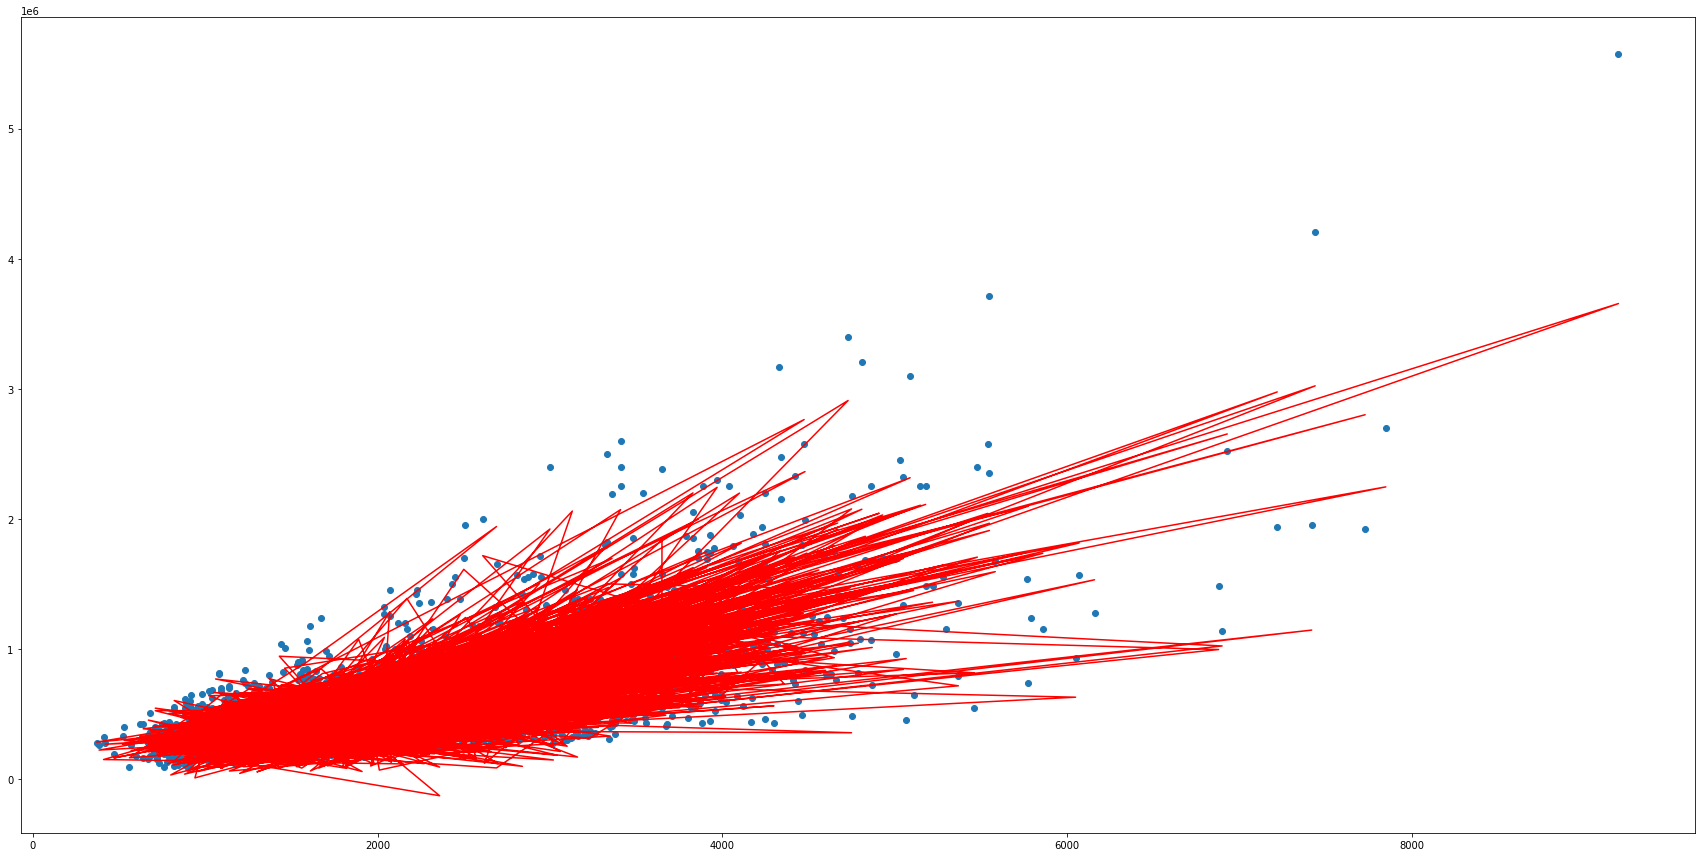

In [ ]:
plt.scatter(X_test.iloc[:,2:3], y_test)
plt.plot(X_test.iloc[:,2:3], y_kestirilen, color='red')
plt.show()

### 5.derece polinom modelleri
**"sqft_living"** özniteliğini kullanarak **"price"** özniteliğini tahmin etmek için 5.derece polinom regresyon modelini kullanacağız.

In [ ]:
from sklearn import preprocessing
X = home_data.iloc[:, 5:6].values#hedef, series
Y = home_data['price'].values#kullanılacak özellik, dataFrame 
X_train,X_test,y_train,y_test = train_test_split(X , Y , test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
model5_basic_poly5 = lin_reg.fit(X_poly, y_train)
print("Model 5 score : ",model5_basic_poly5.score(X_poly, y_train))

Model 5 score :  0.55084172764412


In [ ]:
X_poly_test = poly_reg.fit_transform(X_test)

In [ ]:
y_kestirilen = lin_reg.predict(X_poly_test)

In [ ]:
rmse_basic_model5 = np.sqrt(metrics.mean_squared_error(y_test, y_kestirilen))
print('RMSE:', rmse_basic_model5)

RMSE: 241930.87311854854


In [ ]:
y_pred = lin_reg.predict(X_poly)

In [ ]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_kestirilen})
df

,Real Values,Predicted Values
0,297000,3.780794e+05
1,1578000,1.386102e+06
2,562100,3.797870e+05
3,631500,3.309545e+05
4,780000,7.998719e+05
...,...,...
4318,844000,7.719615e+05
4319,335500,3.503808e+05
4320,369950,3.663671e+05
4321,300000,3.067217e+05


Test kümesi ve eğitilmiş modelimize ait regresyon eğrisini çizdirelim.

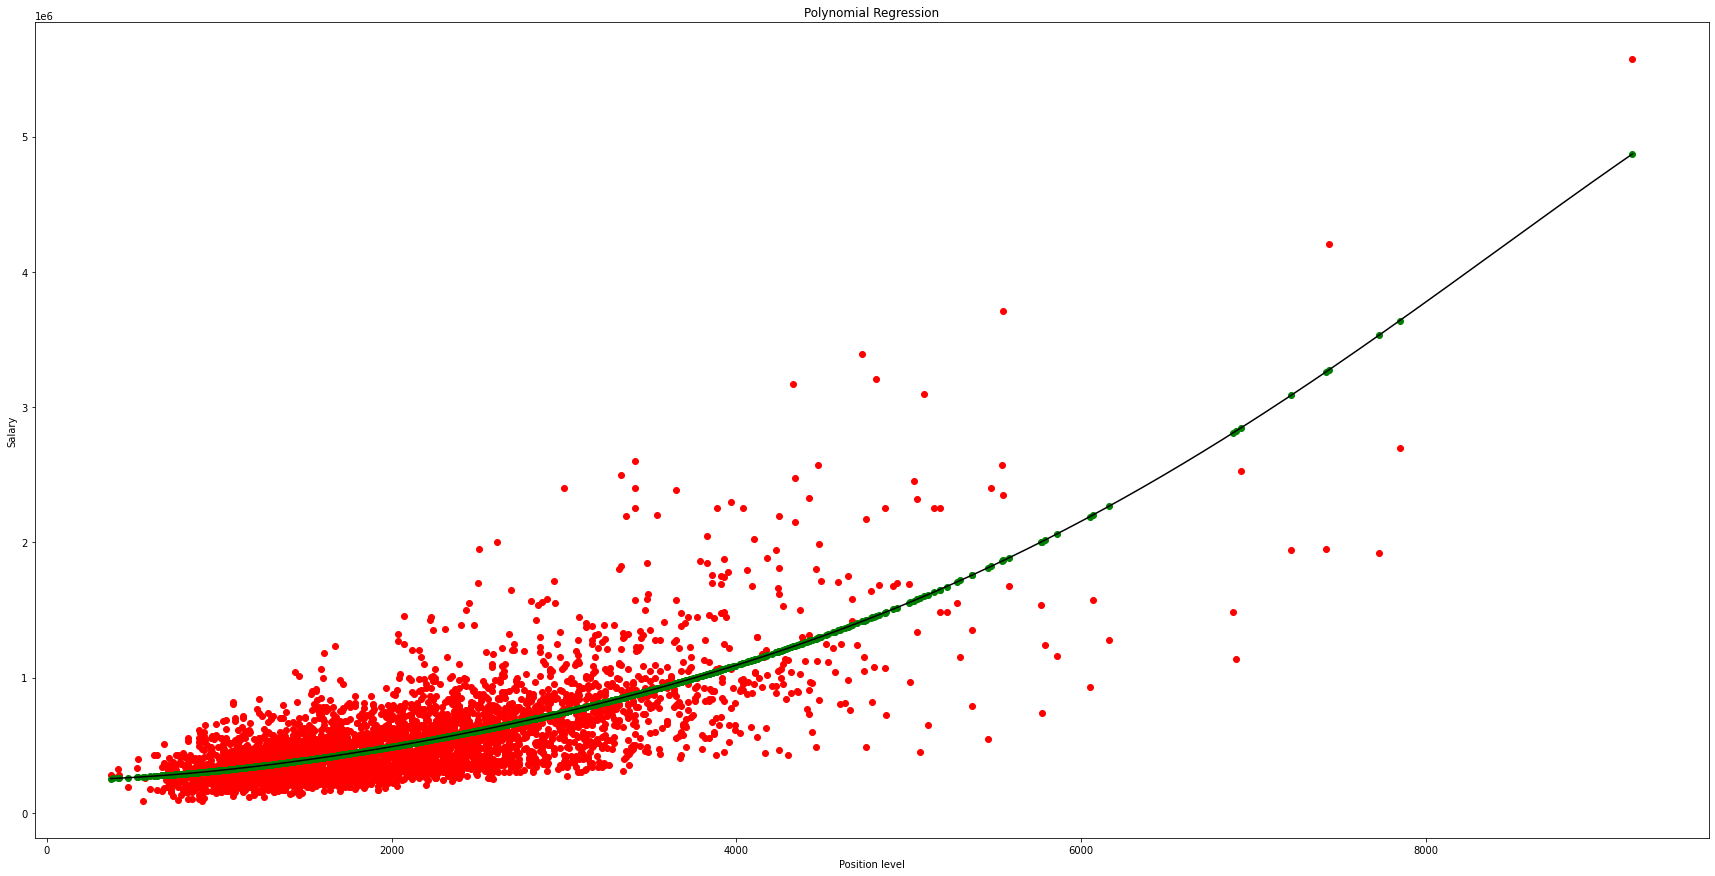

In [ ]:
X_grid = np.arange(min(X_test), max(X_test), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_kestirilen, color = 'green')
plt.plot(X_grid, lin_reg.predict(poly_reg.fit_transform(X_grid)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

**"advance_features"** özniteliklerini kullanarak **"price"** özniteliğini tahmin etmek için 5.derece polinom regresyon modelini kullanacağız.

In [ ]:
from sklearn import preprocessing
X = home_data[advanced_features].values#hedef, series
Y = home_data['price'].values#kullanılacak özellik, dataFrame 
X_train,X_test,y_train,y_test = train_test_split(X , Y , test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
model6_advance_poly5 = lin_reg.fit(X_poly, y_train)
print("Model 6 score : ",model6_advance_poly5.score(X_poly, y_train))

Model 6 score :  0.8845068080317056


In [ ]:
X_poly_test = poly_reg.fit_transform(X_test)

In [ ]:
y_kestirilen = model6_advance_poly5.predict(X_poly_test)

In [ ]:
rmse_advance_model6 = np.sqrt(metrics.mean_squared_error(y_test, y_kestirilen))
print('RMSE:', rmse_advance_model6)

RMSE: 9194903.042096702


In [ ]:
y_pred = model6_advance_poly5.predict(X_poly)

In [ ]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_kestirilen,'a':X_test[:,2:3].flatten()})
df

,Real Values,Predicted Values,a
0,297000,3.750116e+05,1430.0
1,1578000,1.831570e+06,4670.0
2,562100,5.419070e+05,1440.0
3,631500,6.364203e+05,1130.0
4,780000,9.118024e+05,3180.0
...,...,...,...
4318,844000,8.232891e+05,3090.0
4319,335500,3.689578e+05,1260.0
4320,369950,3.021633e+05,1360.0
4321,300000,3.058959e+05,950.0


Test kümesi ve eğitilmiş modelimize ait regresyon eğrisini çizdirelim.

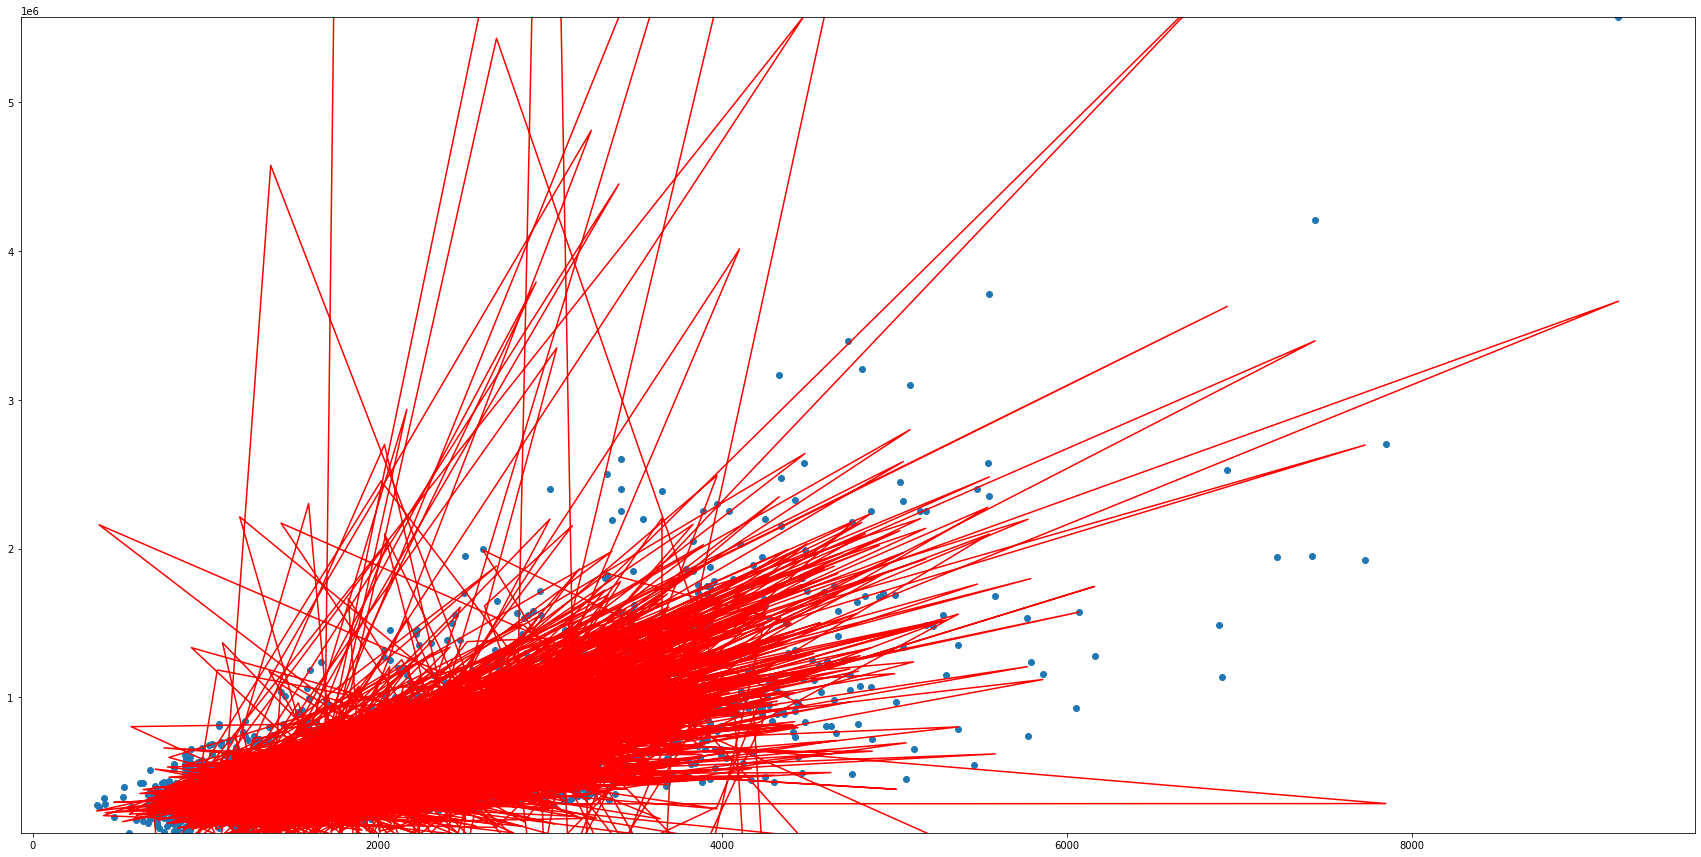

In [ ]:
plt.scatter(X_test[:,2:3], y_test)
plt.plot(X_test[:,2:3], y_kestirilen, color='red')
plt.ylim(min(y_test), max(y_test))
plt.show()
plt.show()

## Modellerin RMSE değerleri

In [ ]:
print("Model 1 RMSE değeri : ",rmse_basic_model1)
print("Model 2 RMSE değeri : ",rmse_advance_model2)
print("Model 3 RMSE değeri : ",rmse_basic_model3)
print("Model 4 RMSE değeri : ",rmse_advance_model4)
print("Model 5 RMSE değeri : ",rmse_basic_model5)
print("Model 6 RMSE değeri : ",rmse_advance_model6)

Model 1 RMSE değeri :  647.3715598616461
Model 2 RMSE değeri :  192355.44075378097
Model 3 RMSE değeri :  240272.02091172073
Model 4 RMSE değeri :  152394.889361217
Model 5 RMSE değeri :  241930.87311854854
Model 6 RMSE değeri :  9194903.042096702


## Tahmin Zamanı 

Şimdi ID numaraları '5309101200' ve '1925069082' olan evlerin satış fiyatlarını tahmin edelim.

In [ ]:
tahmin_edilecekler = pd.concat([home_data[home_data['id'] == 5309101200],home_data[home_data['id'] == 1925069082]], axis=0)
tahmin_edilecekler

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,4,7,1460,940,1929,0,98117,47.6763,-122.370,1250,4880
1361,1925069082,20150511T000000,2200000,5,4.25,4640,22703,2.0,1,4,5,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [ ]:
tahmin_edilecekler.drop(['price'],axis=1)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,4,2.25,2400,5350,1.5,0,0,4,7,1460,940,1929,0,98117,47.6763,-122.370,1250,4880
1361,1925069082,20150511T000000,5,4.25,4640,22703,2.0,1,4,5,8,2860,1780,1952,0,98052,47.6393,-122.097,3140,14200


In [ ]:
tahmin_edilecekler[advanced_features]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,condition,grade,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
1054,4,2.25,2400,5350,1.5,98117,4,7,0,0,1460,940,1929,0,47.6763,-122.370,1250,4880
1361,5,4.25,4640,22703,2.0,98052,5,8,1,4,2860,1780,1952,0,47.6393,-122.097,3140,14200


In [ ]:
sc = StandardScaler()
X_test_model1 = sc.fit_transform(tahmin_edilecekler.iloc[:, 5:6].values)
y_kestirilen_model1 = model1_basic_lin.predict(X_test_model1)

In [ ]:
sc = StandardScaler()
X_test_model2 = sc.fit_transform(tahmin_edilecekler[advanced_features])
y_kestirilen_model2 = model2_advance_lin.predict(X_test_model2)

In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
X_test_model3 = poly_reg.fit_transform(tahmin_edilecekler.iloc[:, 5:6].values)
y_kestirilen_model3 = model3_basic_poly2.predict(X_test_model3)

In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
X_test_model4 = poly_reg.fit_transform(tahmin_edilecekler[advanced_features])
y_kestirilen_model4 = model4_advance_poly2.predict(X_test_model4)

In [ ]:
poly_reg = PolynomialFeatures(degree = 5)
X_test_model5 = poly_reg.fit_transform(tahmin_edilecekler.iloc[:, 5:6].values)
y_kestirilen_model5 = model5_basic_poly5.predict(X_test_model5)

In [ ]:
poly_reg = PolynomialFeatures(degree = 4)
X_test_model6 = poly_reg.fit_transform(tahmin_edilecekler[advanced_features])
y_kestirilen_model6 = model6_advance_poly5.predict(X_test_model6)

In [ ]:
print("Model 1 id:5309101200 için tahmini fiyat: ",y_kestirilen_model1[0],"Evin gerçek fiyatı: ",tahmin_edilecekler['price'].iloc[0]," Tahmin ile arasındaki fark:",np.absolute(y_kestirilen_model1[0]-tahmin_edilecekler['price'].iloc[0]))
print("Model 1 id:1925069082 için tahmini fiyat: ",y_kestirilen_model1[1],"Evin gerçek fiyatı: ",tahmin_edilecekler['price'].iloc[1]," Tahmin ile arasındaki fark:",np.absolute(y_kestirilen_model1[1]-tahmin_edilecekler['price'].iloc[1]))

Model 1 id:5309101200 için tahmini fiyat:  1431.5324201487533 Evin gerçek fiyatı:  620000  Tahmin ile arasındaki fark: 618568.4675798513
Model 1 id:1925069082 için tahmini fiyat:  2731.301009579413 Evin gerçek fiyatı:  2200000  Tahmin ile arasındaki fark: 2197268.6989904204


In [ ]:
print("Model 2 id:5309101200 için tahmini fiyat: ",y_kestirilen_model2[0],"Evin gerçek fiyatı: ",tahmin_edilecekler['price'].iloc[0]," Tahmin ile arasındaki fark:",np.absolute(y_kestirilen_model2[0]-tahmin_edilecekler['price'].iloc[0]))
print("Model 2 id:1925069082 için tahmini fiyat: ",y_kestirilen_model2[1],"Evin gerçek fiyatı: ",tahmin_edilecekler['price'].iloc[1]," Tahmin ile arasındaki fark:",np.absolute(y_kestirilen_model2[1]-tahmin_edilecekler['price'].iloc[1]))

Model 2 id:5309101200 için tahmini fiyat:  [279528.20662135] Evin gerçek fiyatı:  620000  Tahmin ile arasındaki fark: [340471.79337865]
Model 2 id:1925069082 için tahmini fiyat:  [806071.4700704] Evin gerçek fiyatı:  2200000  Tahmin ile arasındaki fark: [1393928.5299296]


In [ ]:
print("Model 3 id:5309101200 için tahmini fiyat: ",y_kestirilen_model3[0],"Evin gerçek fiyatı: ",tahmin_edilecekler['price'].iloc[0]," Tahmin ile arasındaki fark:",np.absolute(y_kestirilen_model3[0]-tahmin_edilecekler['price'].iloc[0]))
print("Model 3 id:1925069082 için tahmini fiyat: ",y_kestirilen_model3[1],"Evin gerçek fiyatı: ",tahmin_edilecekler['price'].iloc[1]," Tahmin ile arasındaki fark:",np.absolute(y_kestirilen_model3[1]-tahmin_edilecekler['price'].iloc[1]))

Model 3 id:5309101200 için tahmini fiyat:  587687.1410161256 Evin gerçek fiyatı:  620000  Tahmin ile arasındaki fark: 32312.858983874437
Model 3 id:1925069082 için tahmini fiyat:  1351666.4414581684 Evin gerçek fiyatı:  2200000  Tahmin ile arasındaki fark: 848333.5585418316


In [ ]:
print("Model 4 id:5309101200 için tahmini fiyat: ",y_kestirilen_model4[0],"Evin gerçek fiyatı: ",tahmin_edilecekler['price'].iloc[0]," Tahmin ile arasındaki fark:",np.absolute(y_kestirilen_model4[0]-tahmin_edilecekler['price'].iloc[0]))
print("Model 4 id:1925069082 için tahmini fiyat: ",y_kestirilen_model4[1],"Evin gerçek fiyatı: ",tahmin_edilecekler['price'].iloc[1]," Tahmin ile arasındaki fark:",np.absolute(y_kestirilen_model4[1]-tahmin_edilecekler['price'].iloc[1]))

Model 4 id:5309101200 için tahmini fiyat:  579089.4287452698 Evin gerçek fiyatı:  620000  Tahmin ile arasındaki fark: 40910.571254730225
Model 4 id:1925069082 için tahmini fiyat:  2396774.228542328 Evin gerçek fiyatı:  2200000  Tahmin ile arasındaki fark: 196774.22854232788


In [ ]:
print("Model 5 id:5309101200 için tahmini fiyat: ",y_kestirilen_model5[0],"Evin gerçek fiyatı: ",tahmin_edilecekler['price'].iloc[0]," Tahmin ile arasındaki fark:",np.absolute(y_kestirilen_model5[0]-tahmin_edilecekler['price'].iloc[0]))
print("Model 5 id:1925069082 için tahmini fiyat: ",y_kestirilen_model5[1],"Evin gerçek fiyatı: ",tahmin_edilecekler['price'].iloc[1]," Tahmin ile arasındaki fark:",np.absolute(y_kestirilen_model5[1]-tahmin_edilecekler['price'].iloc[1]))

Model 5 id:5309101200 için tahmini fiyat:  581347.1760722853 Evin gerçek fiyatı:  620000  Tahmin ile arasındaki fark: 38652.82392771472
Model 5 id:1925069082 için tahmini fiyat:  1371671.1564197997 Evin gerçek fiyatı:  2200000  Tahmin ile arasındaki fark: 828328.8435802003


In [ ]:
print("Model 6 id:5309101200 için tahmini fiyat: ",y_kestirilen_model6[0],"Evin gerçek fiyatı: ",tahmin_edilecekler['price'].iloc[0]," Tahmin ile arasındaki fark:",np.absolute(y_kestirilen_model6[0]-tahmin_edilecekler['price'].iloc[0]))
print("Model 6 id:1925069082 için tahmini fiyat: ",y_kestirilen_model6[1],"Evin gerçek fiyatı: ",tahmin_edilecekler['price'].iloc[1]," Tahmin ile arasındaki fark:",np.absolute(y_kestirilen_model6[1]-tahmin_edilecekler['price'].iloc[1]))

Model 6 id:5309101200 için tahmini fiyat:  634137.7121772766 Evin gerçek fiyatı:  620000  Tahmin ile arasındaki fark: 14137.712177276611
Model 6 id:1925069082 için tahmini fiyat:  2134385.7336626053 Evin gerçek fiyatı:  2200000  Tahmin ile arasındaki fark: 65614.26633739471


**Sonuç** : Model 6'yı kullanmak isterim.Çünkü en iyi RMSE değerleri ve accuracy score veren modeldi ve rastgele iki evi tahmin ettiğimizde aynı rakam olmasa da kafamızda bir fikir oluşturacak kadar bilgi verdiğini söyleyebiliriz.